<a href="https://colab.research.google.com/github/RodrigoRVSN/trafalgar-law/blob/main/04_transformacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>
<br/>

# Transformações geométricas

Neste notebook, iremos fazer algumas operações envolvendo cores.

Primeiro, iremos importar as principais bibliotecas.

In [ ]:
import numpy as np
import cv2  
import os
import urllib.request
import matplotlib.pyplot as plt

## Escalamento

Para o escalamento, precisamos usar a função **resize** que recebe os seguintes argumentos:
- src: a imagem
- dsize: tamanho desejado da nova imagem. Exemplo: (2,3)
- fx: fator de escala em relação ao eixo horizontal
- fy: fator de escala em relação ao eixo vertical
- interpolation: método de interpolação 
     - cv2.INTER_NEAREST: vizinho mais próximo
     - cv2.INTER_LINEAR: interpolação bilinear
     - cv2.INTER_CUBIC: interpolação bicúbica
     
Se você tentar redimensionar usando escala, defina o parâmetro **dsize** como nulo.

Para testar esse método, crie uma imagem quadriculada em tons de cinza usando operações matriciais: imagem preta com listras horizontais e verticais brancas. Depois, adicione o nome "Facens" nessa imagens. 

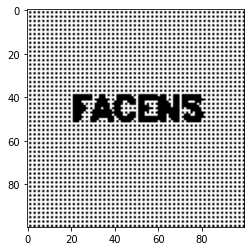

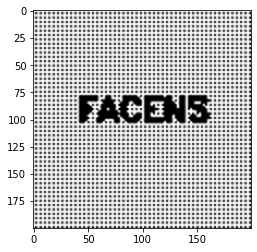

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################
#  
    
background = np.zeros([100, 100, 3], dtype=np.uint8)
    
for i in range(0, background.shape[0], 2):
  background[i, :] = 255

for j in range(0, background.shape[0], 2):
  background[:, j] = 255

# adicionar texto Facens na imagem

background = cv2.putText(background, 
                         text = "FACENS", 
                         org = (20, 50), 
                         fontFace = cv2.FONT_HERSHEY_DUPLEX, 
                         fontScale = 0.5, 
                         color = 0,
                         thickness = 2
                        )


backgroundResized = cv2.resize(src = background, 
                               dsize = None, 
                               fx = 2, 
                               fy = 2,
                               interpolation = cv2.INTER_CUBIC
                              )

plt.imshow(background)
plt.show()
    
plt.imshow(backgroundResized)
plt.show()
    
    

##########################################################
    
# plota a imagem vermelha

As operações de escala, rotação, translação ou cisalhamento também podem ser feitas usando transformação afim.

Para usar a transformação afim, use a função **warpAffine**. Os principais parâmetros são:
- src: imagem
- M: matriz afim. Ela deve ter dimensão 2 x 3. Portanto, não deve ser adicionada a terceira linha da matriz afim tradicional.
- dsize: tamanho da imagem de saída
- flags:  método de interpolação 
     - cv2.INTER_NEAREST: vizinho mais próximo
     - cv2.INTER_LINEAR: interpolação bilinear
     - cv2.INTER_CUBIC: interpolação bicúbica

Use uma operação afim para fazer a escala da imagem feita anteriormente. Faça um escalamento que aumente a imagem de 3 vezes e outro que diminua a imagem. 

A operação afim para escalamento é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1/S_x & 0 & 0\\
0 & 1/S_y & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

No entanto, na biblioteca OpenCV, é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
S_x & 0 & 0\\
0 & S_y & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

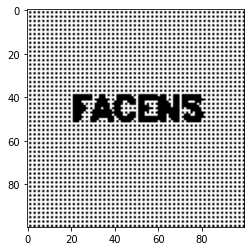

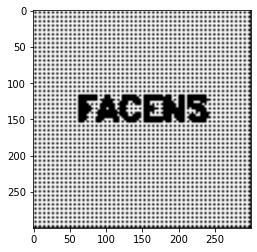

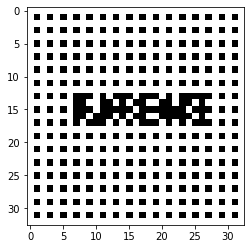

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def resize(image, sx, sy):
  height = image.shape[0]
  width = image.shape[1]

  matAfim = np.array([
      [sx, 0, 0],
      [0, sy, 0],
  ], dtype = np.float64)

  return cv2.warpAffine(src=image, 
                        M=matAfim,
                        dsize=(int(height * sx), int(width * sy))
                        )

imgBigger = resize(background, sx = 3, sy = 3)
imgLower = resize(background, sx =  1 / 3, sy = 1 / 3)

##########################################################

plt.imshow(background, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(imgBigger, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(imgLower, 'gray', vmin=0, vmax=255)
plt.show()

Use uma operação afim para fazer a translação da imagem feita anteriormente.

A operação afim para translação é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & 0 & -d_x\\
0 & 1 & -d_y\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

No entanto, na biblioteca OpenCV, em vez de $-d_x$ e $-d_y$, você deve usar $d_x$ e $d_y$:

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & 0 & d_x\\
0 & 1 & d_y\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$


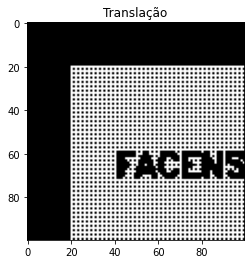

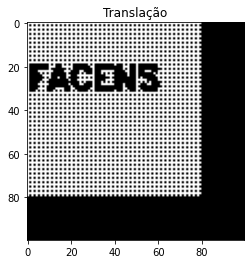

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def translation(image, dx, dy):
  height = image.shape[0]
  width = image.shape[1]

  matAfim = np.array([
      [1, 0, dx],
      [0, 1, dy],
  ], dtype = np.float64)

  return cv2.warpAffine(src=image, 
                        M=matAfim,
                        dsize=(height, width)
                        )


imageTranslation = translation(background, 20, 20)
imageTranslationReverse = translation(background, -20, -20)

##########################################################

plt.imshow(imageTranslation, 'gray', vmin = 0, vmax = 255)
plt.title('Translação')
plt.show()

plt.imshow(imageTranslationReverse, 'gray', vmin = 0, vmax = 255)
plt.title('Translação')
plt.show()

Use uma operação afim para fazer o cisalhamento da imagem feita anteriormente. 

A operação afim para translação é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & -c_v & 0\\
-c_h & 1 & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

No entanto, na biblioteca OpenCV, em vez de $-c_v$ e $-c_h$, você deve usar $c_v$ e $c_h$. Além disso, deve trocá-los de lugar: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & c_h & 0\\
c_v & 1 & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [  0   0   0]
  [255 255 255]
  ...
  [  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [  0   0   0]
  [255 255 255]
  ...
  [  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [  0   0   0]
  [255 255 255]
  ...
  [  0   0   0]
  [255 255 255]
  [  0   0   0]]] [[[255 255 255]
  [199 199 199]
  [151 151 151]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[199 199 199]
  [ 73  73  73]
  [235 235 235]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[151 151 151]
  [235 235 235]
  [225 225 225]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

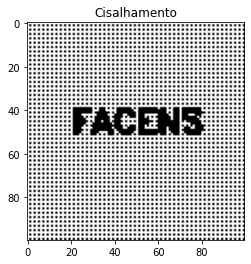

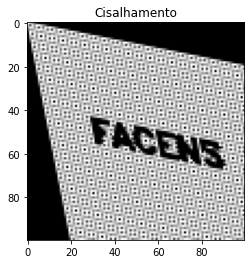

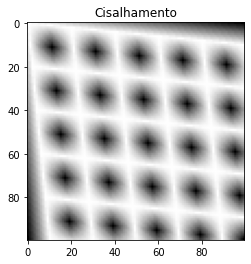

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def shear(image, ch, cv):
  height = image.shape[0]
  width = image.shape[1]

  matAfim = np.array([
      [1, ch, 0],
      [cv, 1, 0],
  ], dtype = np.float64)

  return cv2.warpAffine(src=image, 
                        M=matAfim,
                        dsize=(height, width)
                        )

imgShearLow = shear(background, 0.2, 0.2)
imgShearHeight = shear(background, 10, 10)

print(background, imgShearLow)

##########################################################

plt.imshow(background, 'gray', vmin = 0, vmax = 255)
plt.title('Cisalhamento')
plt.show()
    
plt.imshow(imgShearLow, 'gray', vmin = 0, vmax = 255)
plt.title('Cisalhamento')
plt.show()

plt.imshow(imgShearHeight, 'gray', vmin = 0, vmax = 255)
plt.title('Cisalhamento')
plt.show()


Use uma operação afim para fazer a rotação da imagem feita anteriormente. 

A operação afim para rotação é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\
\sin(\theta) & \cos(\theta) & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

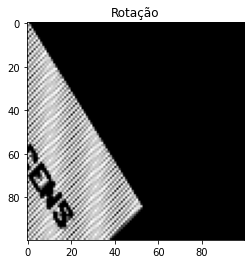

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def rotate(image, theta):
  height = image.shape[0]
  width = image.shape[1]

  matAfim = np.array([
      [np.cos(theta), -np.cos(theta), 0],
      [np.sin(theta), np.cos(theta), 0],
  ], dtype = np.float64)

  return cv2.warpAffine(src=image, 
                        M=matAfim,
                        dsize=(height, width)
                        )

imgRotation = rotate(background, 45)

##########################################################

plt.imshow(imgRotation, 'gray', vmin = 0, vmax = 255)
plt.title('Rotação')
plt.show()
    

Criando uma matriz de rotação ao centro.

Para obter uma matriz afim para fazer a rotação em relação a um determinado ponto, use a função **getRotationMatrix2D** que possui os seguintes parâmetros:
- center: o ponto que será usado como centro da rotação
- angle: ângulo da rotação
- scale: fator de escalamento

Depois de obter a matriz afim, use ela como argumento de entrada para a função **warpAffine**.

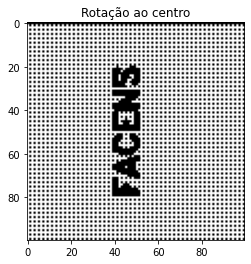

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################


def rotateCenter(image, theta):
  height = image.shape[0]
  width = image.shape[1]

  center = (height / 2, width / 2)


  matAfim = cv2.getRotationMatrix2D(center, angle = theta, scale = 1)

  return cv2.warpAffine(src=image, 
                        M=matAfim,
                        dsize=(height, width)
                        )

imgRotationCenter = rotateCenter(background, 90)

##########################################################

plt.imshow(imgRotationCenter, 'gray', vmin = 0, vmax = 255)
plt.title('Rotação ao centro')
plt.show()

Além das operações principais, uma matriz afim também pode ser usada para outras operações, como o espelhamento.

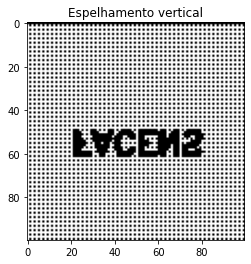

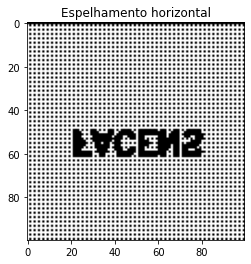

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def mirror(image):
  height = image.shape[0]
  width = image.shape[1]

  matAfim = np.array([
      [1, 0, 0],
      [0, -1, height]
      ], dtype = float)

  return cv2.warpAffine(src=image, 
                        M=matAfim,
                        dsize=(height, width)
                        )

imgHorizontal = mirror(background)

##########################################################

plt.imshow(imgHorizontal, 'gray', vmin = 0, vmax = 255)
plt.title('Espelhamento vertical')
plt.show()

plt.imshow(imgHorizontal, 'gray', vmin = 0, vmax = 255)
plt.title('Espelhamento horizontal')
plt.show()
    

# Exercícios

Faça uma função que realize a operação de escalamento usando apenas operações matriciais. 

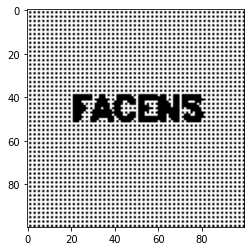

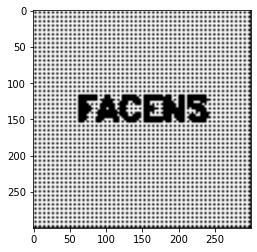

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################
def resize(image, sx, sy):
  height = image.shape[0]
  width = image.shape[1]

  matAfim = np.array([
      [sx, 0, 0],
      [0, sy, 0],
  ], dtype = np.float64)

  return cv2.warpAffine(src=image, 
                        M=matAfim,
                        dsize=(int(height * sx), int(width * sy))
                        )

imgBigger = resize(background, sx = 3, sy = 3)

##########################################################

plt.imshow(background, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(imgBigger, 'gray', vmin=0, vmax=255)
plt.show()